In [40]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

# 기본환경구축

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings(action='ignore')

In [3]:
main_df = pd.read_csv("/content/drive/MyDrive/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv", encoding='euc-kr')

In [4]:
main_df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

# 가설검증

### 가설1. 주말(금-토)의 매출건수가 높고, 주초(일-월)의 매출건수가 낮다

In [5]:
sub1 = main_df[['기준_분기_코드','월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']]
sub2 = main_df[['상권_코드_명','월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율']]
sub3 = main_df[['상권_코드_명', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']]
sub4 = main_df[['상권_코드_명', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율']]

##### 시각화1

In [6]:
sub1

,기준_분기_코드,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수
0,1,3208,3397,3589,3073,3088,4511,4636
1,1,1120,1319,1463,1164,1369,2809,2795
2,1,18,0,34,27,27,27,44
3,1,190,258,128,244,159,182,198
4,1,48,32,24,0,24,0,0
...,...,...,...,...,...,...,...,...
140825,4,1601,1514,1861,2053,2862,2227,2006
140826,4,611,623,798,833,811,1943,905
140827,4,1128,1217,810,1052,1833,1640,1080
140828,4,0,0,370,0,0,0,0


In [7]:
sub1_1 = sub1.groupby(['기준_분기_코드']).sum()
sub1_1

,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수
기준_분기_코드,,,,,,,
1,121417080,123811848,126754412,110974438,121472439,113523805,82025646
2,139275165,138222247,136223904,137897809,147837990,129695585,93503583
3,132858253,126609022,131752478,148571145,146482116,127243239,90605784
4,129579640,132773305,134312804,136033041,155480722,126979457,90278301


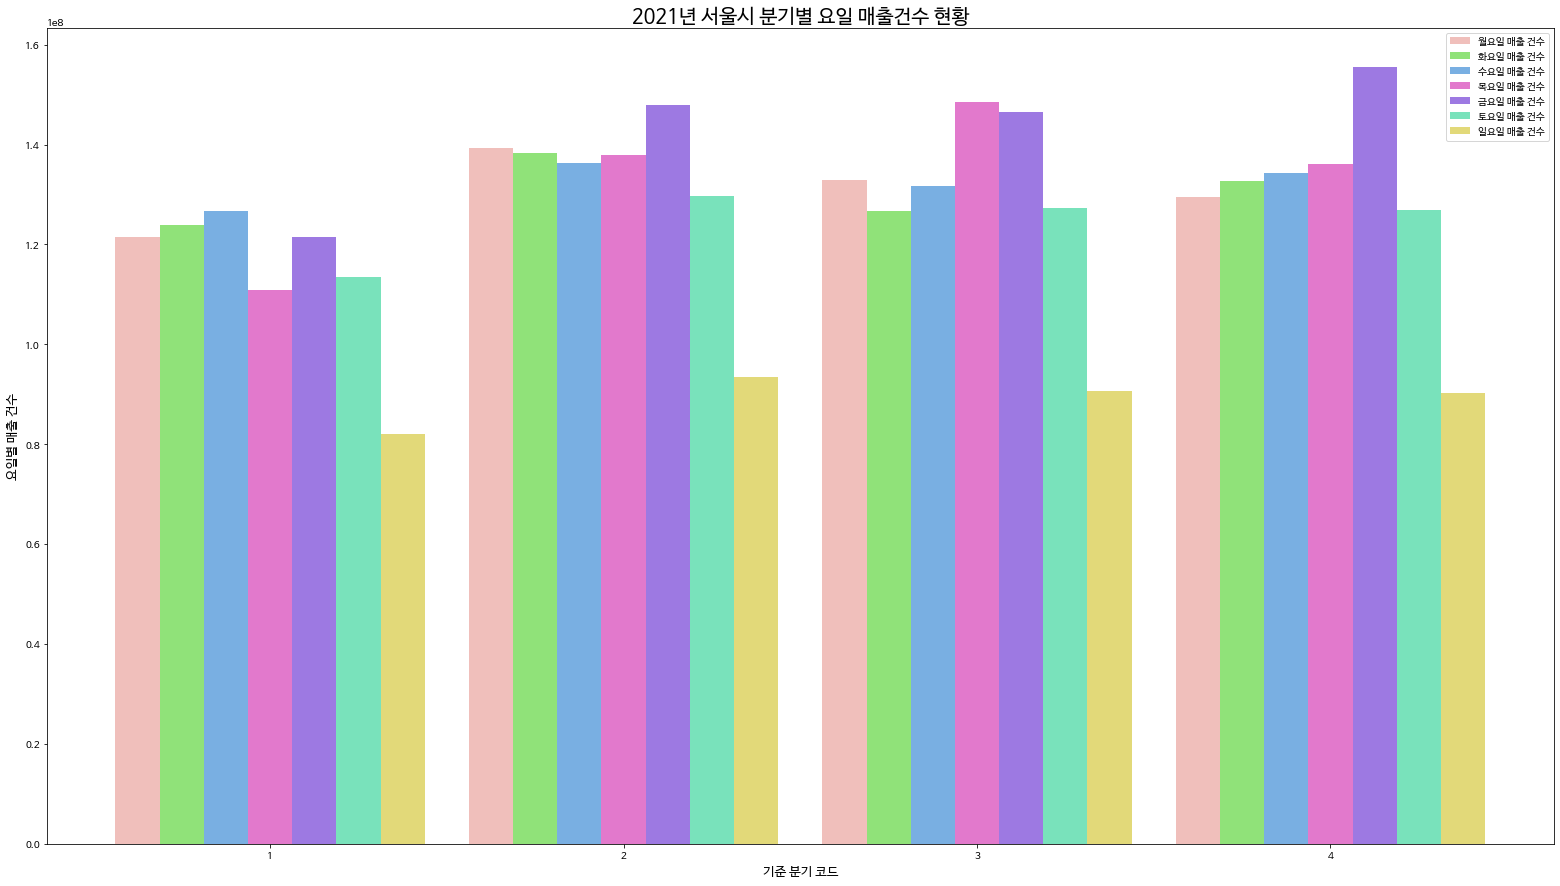

In [8]:
import seaborn as sns
colors = sns.color_palette('hls',7)

fig, ax = plt.subplots(figsize=(27,15))
bar_width = 1/8


index = np.arange(4)

b1 = plt.bar(index, sub1_1['월요일_매출_건수'], bar_width, alpha=0.4, color=colors[0], label='월요일 매출 건수')
b2 = plt.bar(index + bar_width, sub1_1['화요일_매출_건수'], bar_width, alpha=0.8, color=colors[2], label='화요일 매출 건수')
b3 = plt.bar(index + 2 * bar_width, sub1_1['수요일_매출_건수'], bar_width, alpha=0.8, color=colors[4], label='수요일 매출 건수')
b4 = plt.bar(index + 3 * bar_width, sub1_1['목요일_매출_건수'], bar_width, alpha=0.8, color=colors[6], label='목요일 매출 건수')
b5 = plt.bar(index + 4 * bar_width, sub1_1['금요일_매출_건수'], bar_width, alpha=0.8, color=colors[5], label='금요일 매출 건수')
b6 = plt.bar(index + 5 * bar_width, sub1_1['토요일_매출_건수'], bar_width, alpha=0.8, color=colors[3], label='토요일 매출 건수')
b7 = plt.bar(index + 6 * bar_width, sub1_1['일요일_매출_건수'], bar_width, alpha=0.8, color=colors[1], label='일요일 매출 건수')

plt.xticks(np.arange(3 * bar_width, 4 + 3 * bar_width, 1), [1,2,3,4])

plt.xlabel('기준 분기 코드', size = 13)
plt.ylabel('요일별 매출 건수', size = 13)
plt.title('2021년 서울시 분기별 요일 매출건수 현황', fontsize=20)
plt.legend(loc='best')
plt.show()

- 주말의 매출건수가 높고 주초의 매출건수가 적을 것이라고 예측했으나, 주말을 앞둔 주중(목-금)의 매출건수가 가장높으며, 주말보다는 주중의 매출건수가 더 높거나 유사하게 나타나고 있다

##### 시각화2

In [9]:
sub3_1 = sub3.groupby(['상권_코드_명']).sum()

In [35]:
sub3_1['총_매출_건수'] = sub3_1['월요일_매출_건수'] + sub3_1['화요일_매출_건수'] + sub3_1['수요일_매출_건수'] + sub3_1['목요일_매출_건수'] + sub3_1['금요일_매출_건수'] + sub3_1['토요일_매출_건수'] + sub3_1['일요일_매출_건수']
sub3_1 = sub3_1.sort_values('총_매출_건수', ascending=False)
sub3_1 = sub3_1.head(10)
sub3_1

,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,총_매출_건수
상권_코드_명,,,,,,,,
가산디지털단지,9127350,9561753,9439990,9746020,9512734,3890357,3050469,54328673
명동 남대문 북창동 다동 무교동 관광특구,7659700,7973208,8041612,8165098,8330234,5174323,2804667,48148842
강남역,7067292,7282697,7235952,7416051,7916210,6160449,3751148,46829799
노량진역(노량진),5153194,5101152,5320072,5518182,7201338,10726560,7101861,46122359
동대문패션타운 관광특구,4525409,4554410,4771982,4722345,5049858,4906575,3210774,31741353
역삼역,4828807,5113427,5006074,5192552,4985037,2049408,1423826,28599131
종로·청계 관광특구,3593542,3610709,3953201,3853681,3980432,3999644,2266718,25257927
여의도역(여의도),4147462,4358366,4253474,4403422,4346430,1860531,1293473,24663158
가락시장,3779217,3667987,3642736,3641412,4066552,3650981,1394310,23843195


In [11]:
top10 = list(sub3_1.index)

In [12]:
sub4_1 = sub4[sub4['상권_코드_명'].isin(top10)]
sub4_2 = sub4_1.groupby(['상권_코드_명']).mean()
sub4_2

,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
상권_코드_명,,,,,,,
가락시장,14.923077,15.076923,15.907692,15.384615,20.184615,13.400000,5.446154
가산디지털단지,17.175610,16.892683,17.897561,17.560976,17.224390,8.609756,4.951220
강남역,15.120773,14.671498,15.028986,15.797101,17.806763,14.603865,7.323671
노량진역(노량진),14.750000,14.970238,13.875000,13.630952,15.755952,16.636905,10.720238
동대문패션타운 관광특구,13.966102,14.028249,15.039548,15.338983,16.112994,16.062147,9.790960
명동 남대문 북창동 다동 무교동 관광특구,16.909910,15.689189,17.279279,16.252252,17.518018,11.581081,5.040541
여의도역(여의도),16.082902,17.305699,16.212435,16.958549,18.253886,10.181347,5.300518
역삼역,14.975369,17.364532,16.000000,16.763547,17.330049,12.118227,5.699507
을지로3가역,17.402778,18.958333,16.895833,16.722222,17.465278,9.166667,3.756944


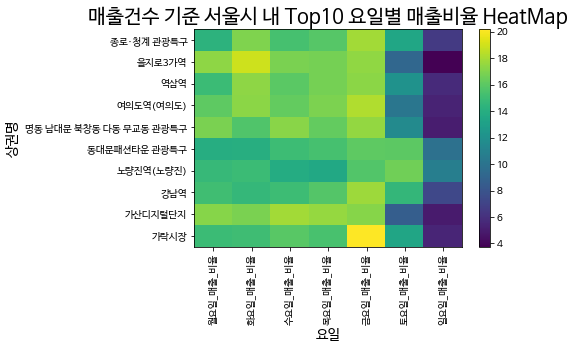

In [13]:
plt.pcolor(sub4_2)

plt.xticks(np.arange(0.5, len(sub4_2.columns), 1), sub4_2.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sub4_2.index), 1), sub4_2.index)

plt.title('매출건수 기준 서울시 내 Top10 요일별 매출비율 HeatMap', fontsize=20)
plt.xlabel('요일', fontsize=14)
plt.ylabel('상권명', fontsize=14)
plt.colorbar()

plt.show()

- 주말이 가까워지는 주중의 매출건수가 주말의 매출건수보다 높게 나타난다.

### 가설2. 상권 이용이 가장높은 시간대



In [14]:
sub5 = main_df[['기준_분기_코드','시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']]
sub6 = main_df[['상권_코드_명','시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']]

In [15]:
sub5_1 = sub5.groupby(['기준_분기_코드']).sum()
sub5_1

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수
기준_분기_코드,,,,,,
1,19115594,107423270,205745755,180192713,224109676,63392658
2,25256213,131361248,233822552,193926565,252145490,86144215
3,21382883,136988584,233031157,192784778,247962706,71971929
4,26988199,126464993,234905341,199452633,242122060,75504042


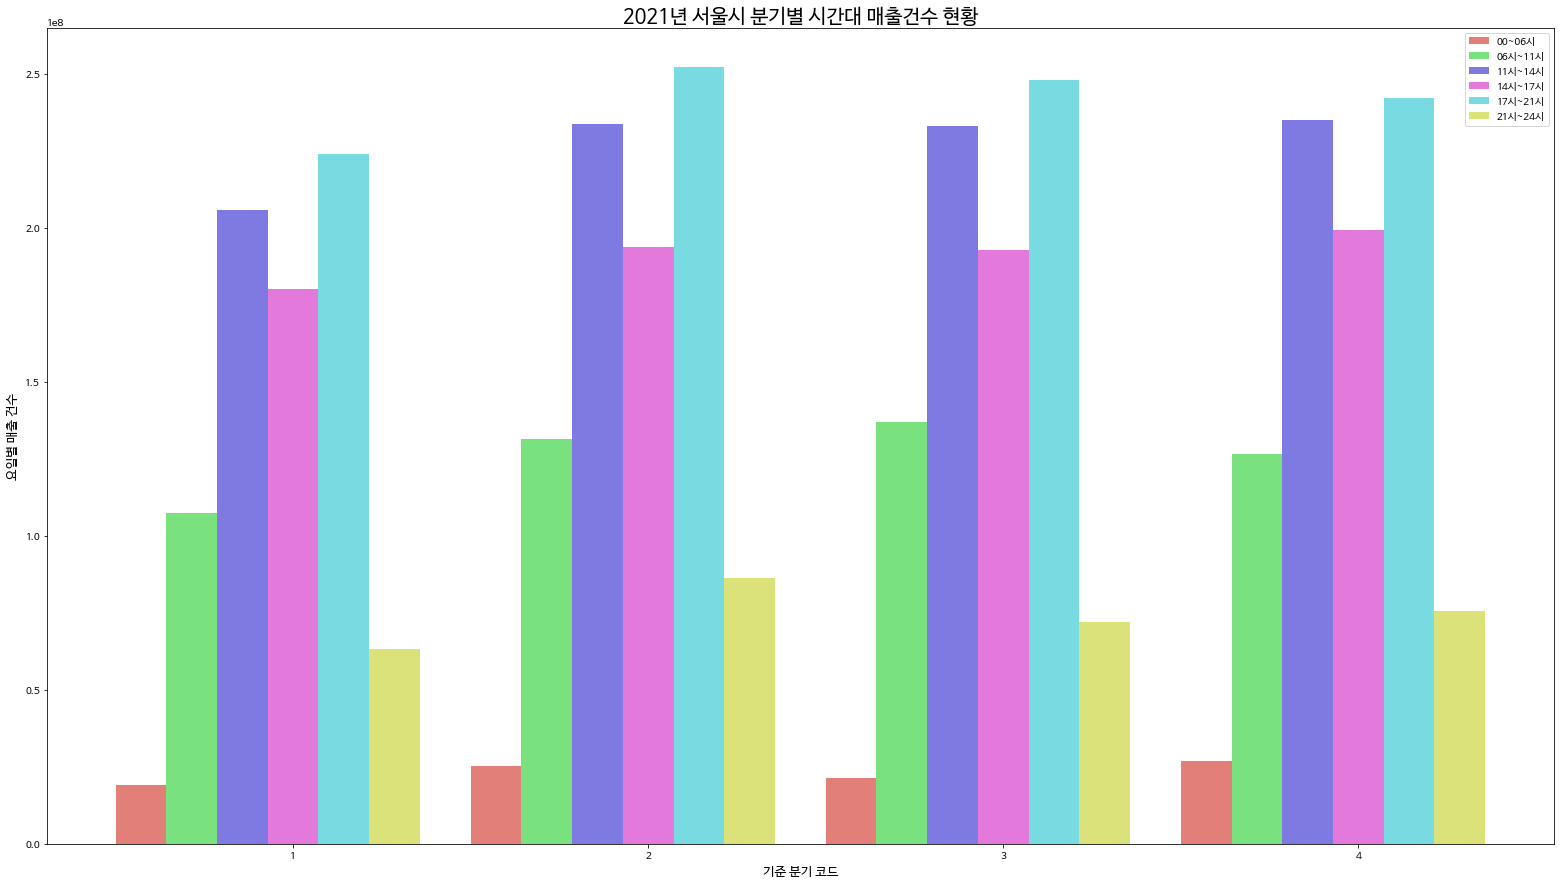

In [16]:
colors = sns.color_palette('hls',6)

fig, ax = plt.subplots(figsize=(27,15))
bar_width = 1/7


index = np.arange(4)

b1 = plt.bar(index, sub5_1['시간대_건수~06_매출_건수'], bar_width, alpha=0.8, color=colors[0], label='00~06시')
b2 = plt.bar(index + bar_width, sub5_1['시간대_건수~11_매출_건수'], bar_width, alpha=0.8, color=colors[2], label='06시~11시')
b3 = plt.bar(index + 2 * bar_width, sub5_1['시간대_건수~14_매출_건수'], bar_width, alpha=0.8, color=colors[4], label='11시~14시')
b4 = plt.bar(index + 3 * bar_width, sub5_1['시간대_건수~17_매출_건수'], bar_width, alpha=0.8, color=colors[5], label='14시~17시')
b5 = plt.bar(index + 4 * bar_width, sub5_1['시간대_건수~21_매출_건수'], bar_width, alpha=0.8, color=colors[3], label='17시~21시')
b6 = plt.bar(index + 5 * bar_width, sub5_1['시간대_건수~24_매출_건수'], bar_width, alpha=0.8, color=colors[1], label='21시~24시')


plt.xticks(np.arange(3 * bar_width, 4 + 3 * bar_width, 1), [1,2,3,4])

plt.xlabel('기준 분기 코드', size = 13)
plt.ylabel('요일별 매출 건수', size = 13)
plt.title('2021년 서울시 분기별 시간대 매출건수 현황', fontsize=20)
plt.legend(loc='best')
plt.show()

- 유동인구가 적은 시간대인 21-24시, 익일 00-06시의 매출건수는 적고, 유동 인구가 많은 시간대인 11-14시, 14시-17시, 17시-21시의 매출건수는 높게 나타남.

In [17]:
sub6_1 = sub6[sub6['상권_코드_명'].isin(top10)]
sub6_2 = sub6_1.groupby(['상권_코드_명']).sum()

In [18]:
sub6_2

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수
상권_코드_명,,,,,,
가락시장,6285615,5525982,3643061,3815651,2621664,1951222
가산디지털단지,370500,12274572,19648019,10229815,10066841,1738926
강남역,668065,7228792,13251537,9451809,12703561,3526035
노량진역(노량진),1142018,7318161,11081234,11236051,13272602,2072293
동대문패션타운 관광특구,2072838,3316919,6817800,7067494,9394820,3071482
명동 남대문 북창동 다동 무교동 관광특구,275121,8639427,17762371,10764349,9046664,1660910
여의도역(여의도),181541,4846069,8966715,4278063,5209203,1181567
역삼역,820485,5629581,10059136,4558381,5547710,1983838
을지로3가역,183794,4936309,9034224,5080714,3520374,834072


### 가설3. 연령대별 매출건수

In [24]:
sub7 = main_df[['기준_분기_코드','연령대_10_매출_건수',
       '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수']]

In [25]:
sub7_1 = sub7.groupby(['기준_분기_코드']).sum()


In [27]:
sub7_1

,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
기준_분기_코드,,,,,,
1,11619974,172564164,179789582,153616808,138749265,109673440
2,15964544,206259833,207810860,176991558,156535941,121352574
3,15787226,200492266,198889998,173492089,156975864,123567155
4,16690020,203446211,198353192,172003299,152605686,123959762


ValueError: ignored

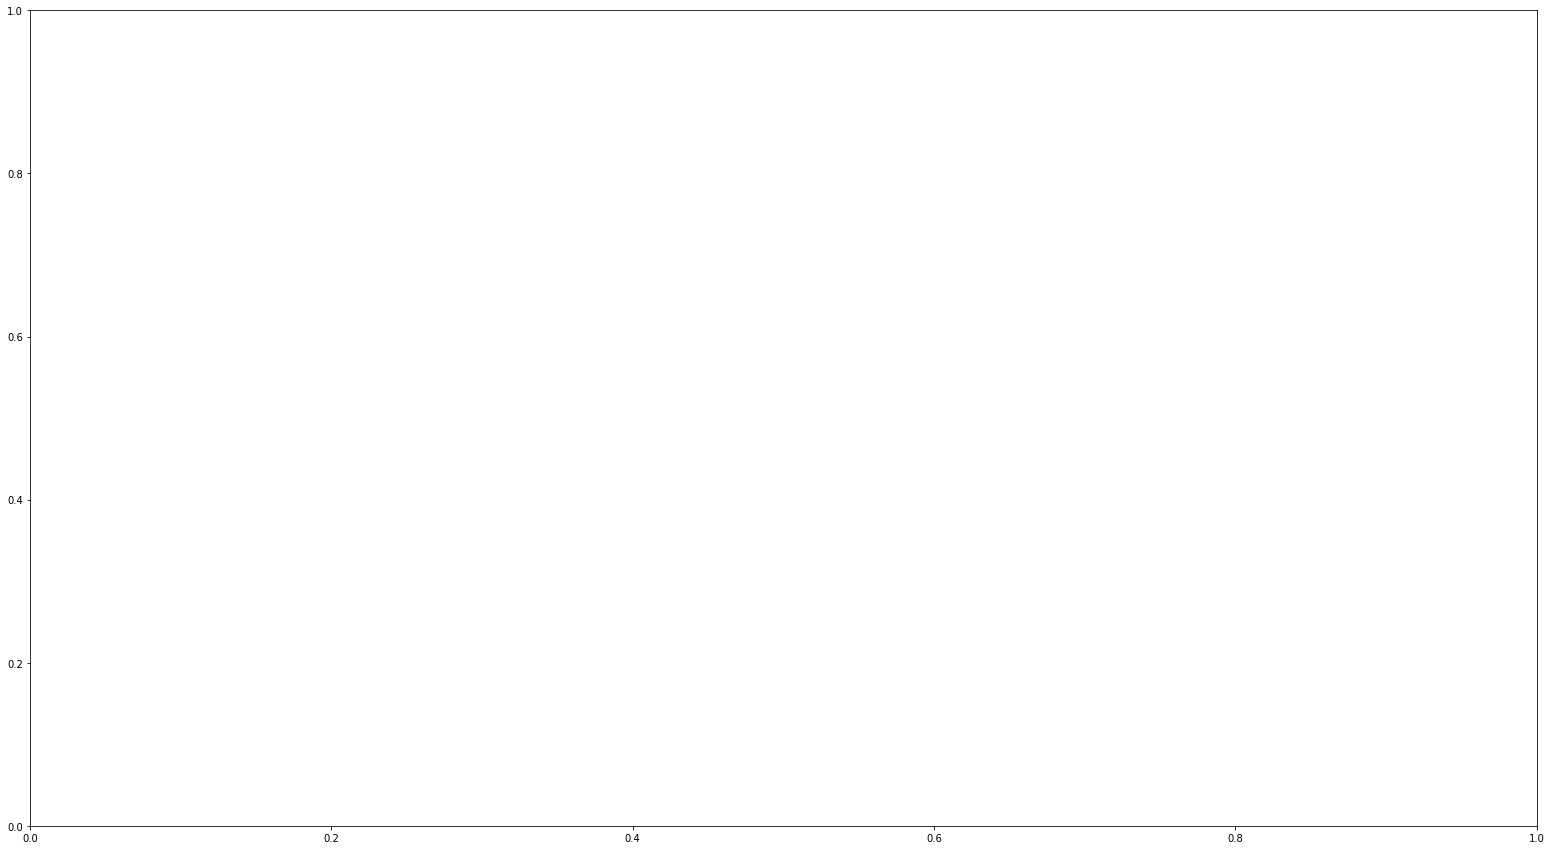

In [28]:
colors = sns.color_palette('hls',6)

fig, ax = plt.subplots(figsize=(27,15))
bar_width = 1/7


index = np.arange(10)

b1 = plt.bar(index, sub7_1['연령대_10_매출_건수'], bar_width, alpha=0.8, color=colors[0], label='10대 매출건수')
b2 = plt.bar(index + bar_width, sub7_1['연령대_20_매출_건수'], bar_width, alpha=0.8, color=colors[2], label='20대 매출건수')
b3 = plt.bar(index + 2 * bar_width, sub7_1['연령대_30_매출_건수'], bar_width, alpha=0.8, color=colors[4], label='30대 매출건수')
b4 = plt.bar(index + 3 * bar_width, sub7_1['연령대_40_매출_건수'], bar_width, alpha=0.8, color=colors[5], label='40대 매출건수')
b5 = plt.bar(index + 4 * bar_width, sub7_1['연령대_50_매출_건수'], bar_width, alpha=0.8, color=colors[3], label='50대 매출건수')
b6 = plt.bar(index + 5 * bar_width, sub7_1['연령대_60_이상_매출_건수'], bar_width, alpha=0.8, color=colors[1], label='60대 이상 매출건수')


plt.xticks(np.arange(3 * bar_width, 4 + 3 * bar_width, 1), [1,2,3,4])

plt.xlabel('기준 분기 코드', size = 13)
plt.ylabel('요일별 매출 건수', size = 13)
plt.title('2021년 서울시 분기별 연령-매출건수 현황', fontsize=20)
plt.legend(loc='best')
plt.show()

- 분기별로 살펴본 결과, 대부분 4-50대의 매출 비율이 가장 높다. 
- 대부분의 10대~20대의 매출 비율이 가장 낮다.
- 사회적으로 더 안정적인 경제력을 갖출수록 소비생활이 더 잦음을 추론해볼 수 있다

In [24]:
sub5 = main_df[['상권_코드_명', '서비스_업종_코드_명', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']]
top10_area = list(sub3_1.index)
top10_service = ['슈퍼마켓', '의약품', '커피-음료', '편의점', '한식음식점']
sub5_1 = sub5.groupby(['상권_코드_명', '서비스_업종_코드_명']).sum()
sub5_1 = sub5[sub5['상권_코드_명'].isin(top10_area)]    
sub5_1 = sub5_1[sub5['서비스_업종_코드_명'].isin(top10_service)] 

In [25]:
sub5_1['상권_코드_명'].unique()

array(['을지로3가역', '가산디지털단지', '여의도역(여의도)', '노량진역(노량진)', '강남역', '역삼역',
       '가락시장', '명동 남대문 북창동 다동 무교동 관광특구', '동대문패션타운 관광특구', '종로·청계 관광특구'],
      dtype=object)

### 업종별 이용 시간대 알아보기

In [26]:
sub6 = sub5_1[sub5_1['상권_코드_명'].isin(top10_area)]
sub6_1 = sub6.groupby(['서비스_업종_코드_명']).sum()
sub6_2 = sub6.groupby(['상권_코드_명']).sum()

In [27]:
sub6_1['총 매출 건수'] = sub6_1['시간대_건수~06_매출_건수'] +  sub6_1['시간대_건수~11_매출_건수'] +  sub6_1['시간대_건수~14_매출_건수'] +  sub6_1['시간대_건수~17_매출_건수'] +sub6_1['시간대_건수~21_매출_건수'] +  sub6_1['시간대_건수~24_매출_건수'] 

In [28]:
sub6_1 = sub6_1.sort_values(['총 매출 건수'], ascending=False)

In [29]:
sub6_1.index

Index(['편의점', '커피-음료', '한식음식점', '의약품', '슈퍼마켓'], dtype='object', name='서비스_업종_코드_명')

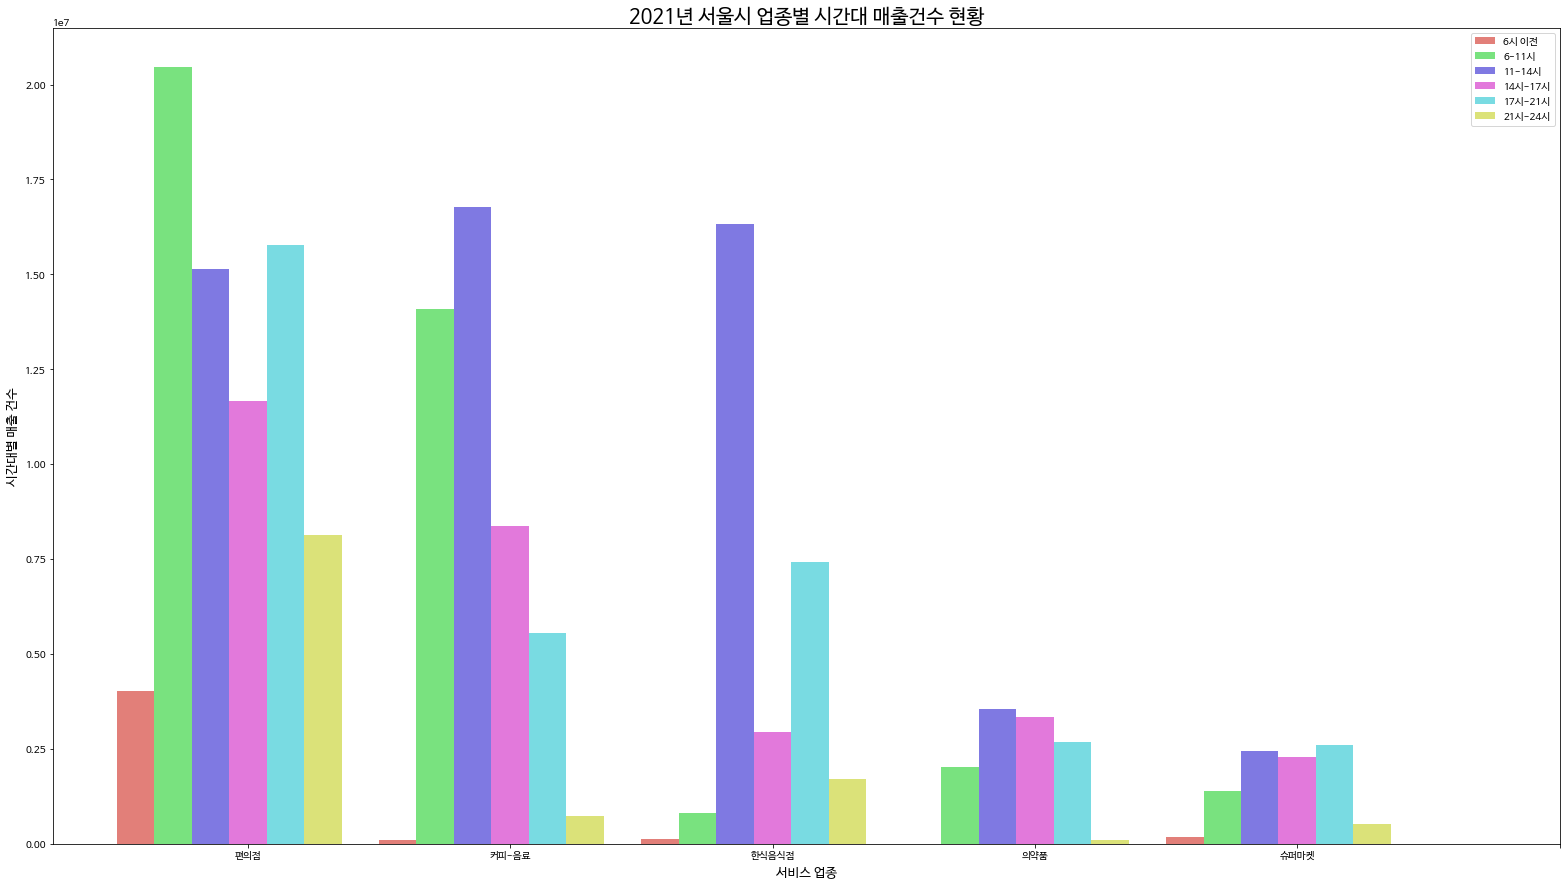

In [30]:
colors = sns.color_palette('hls',6)

fig, ax = plt.subplots(figsize=(27,15))
bar_width = 1/7


index = np.arange(5)

b1 = plt.bar(index, sub6_1['시간대_건수~06_매출_건수'], bar_width, alpha=0.8, color=colors[0], label='6시 이전')
b2 = plt.bar(index + bar_width, sub6_1['시간대_건수~11_매출_건수'], bar_width, alpha=0.8, color=colors[2], label='6-11시')
b3 = plt.bar(index + 2 * bar_width, sub6_1['시간대_건수~14_매출_건수'], bar_width, alpha=0.8, color=colors[4], label='11-14시')
b4 = plt.bar(index + 3 * bar_width, sub6_1['시간대_건수~17_매출_건수'], bar_width, alpha=0.8, color=colors[5], label='14시-17시')
b5 = plt.bar(index + 4 * bar_width, sub6_1['시간대_건수~21_매출_건수'], bar_width, alpha=0.8, color=colors[3], label='17시-21시')
b6 = plt.bar(index + 5 * bar_width, sub6_1['시간대_건수~24_매출_건수'], bar_width, alpha=0.8, color=colors[1], label='21시-24시')

plt.xticks(np.arange(3 * bar_width, 5 + 5 * bar_width, 1), sub6_1.index)

plt.xlabel('서비스 업종', size = 13)
plt.ylabel('시간대별 매출 건수', size = 13)
plt.title('2021년 서울시 업종별 시간대 매출건수 현황', fontsize=20)
plt.legend(loc='best')
plt.show()

### 상권별 이용 시간대 알아보기(매출건수 기준)

In [31]:
sub6_2

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수
상권_코드_명,,,,,,
가락시장,736510,855123,691150,578556,851147,500809
가산디지털단지,328030,9951379,11540089,5100114,5274708,1206070
강남역,538087,5751907,7810189,5277654,7003859,2255023
노량진역(노량진),350589,2235033,2544044,1596749,2665760,1074601
동대문패션타운 관광특구,1021667,1314614,1832369,1307217,1981867,1173176
명동 남대문 북창동 다동 무교동 관광특구,203087,6198519,10192504,4891332,4677876,1113160
여의도역(여의도),167856,4223417,6058512,2938605,3182853,771095
역삼역,733230,4683842,7152160,3404084,4056294,1648757
을지로3가역,174713,1884005,2776167,1265877,1629413,664961


In [33]:
sub6_2['총 매출 건수'] = sub6_2['시간대_건수~06_매출_건수'] + sub6_2['시간대_건수~11_매출_건수'] + sub6_2['시간대_건수~14_매출_건수'] + sub6_2['시간대_건수~17_매출_건수'] + sub6_2['시간대_건수~21_매출_건수'] + sub6_2['시간대_건수~24_매출_건수']
sub6_2 = sub6_2.sort_values(['총 매출 건수'], ascending=False)

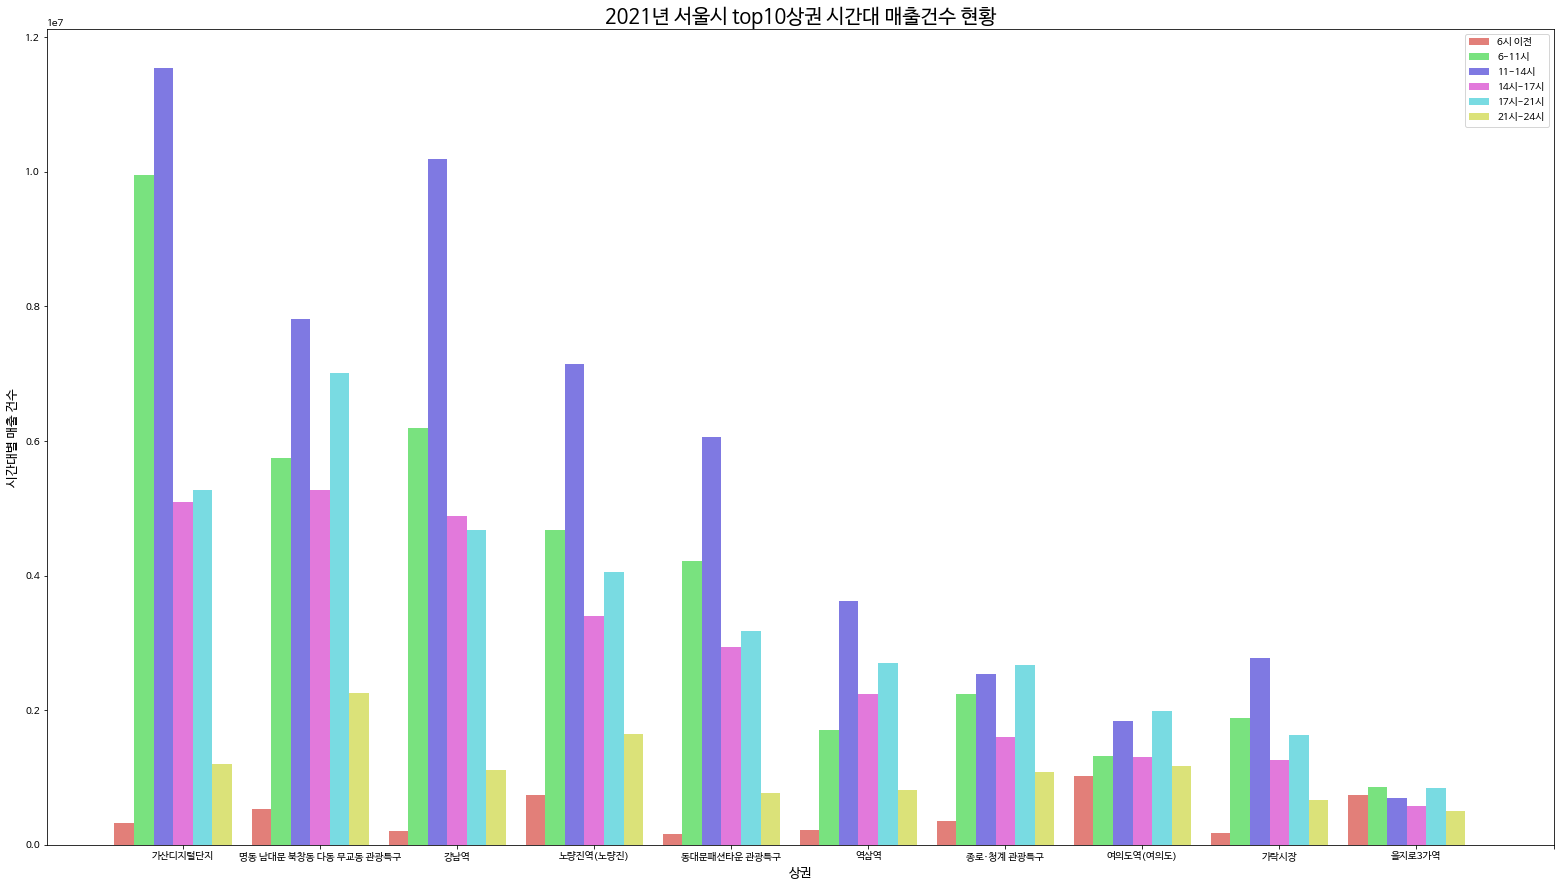

In [47]:
colors = sns.color_palette('hls',6)

fig, ax = plt.subplots(figsize=(27,15))
bar_width = 1/7


index = np.arange(10)

b1 = plt.bar(index, sub6_2['시간대_건수~06_매출_건수'], bar_width, alpha=0.8, color=colors[0], label='6시 이전')
b2 = plt.bar(index + bar_width, sub6_2['시간대_건수~11_매출_건수'], bar_width, alpha=0.8, color=colors[2], label='6-11시')
b3 = plt.bar(index + 2 * bar_width, sub6_2['시간대_건수~14_매출_건수'], bar_width, alpha=0.8, color=colors[4], label='11-14시')
b4 = plt.bar(index + 3 * bar_width, sub6_2['시간대_건수~17_매출_건수'], bar_width, alpha=0.8, color=colors[5], label='14시-17시')
b5 = plt.bar(index + 4 * bar_width, sub6_2['시간대_건수~21_매출_건수'], bar_width, alpha=0.8, color=colors[3], label='17시-21시')
b6 = plt.bar(index + 5 * bar_width, sub6_2['시간대_건수~24_매출_건수'], bar_width, alpha=0.8, color=colors[1], label='21시-24시')

plt.xticks(np.arange(3 * bar_width, 10 + 5 * bar_width, 1), ['가산디지털단지', '명동 남대문 북창동 다동 무교동 관광특구', '강남역', '노량진역(노량진)', '동대문패션타운 관광특구',
       '역삼역', '종로·청계 관광특구', '여의도역(여의도)', '가락시장', '을지로3가역'])

plt.xlabel('상권', size = 13)
plt.ylabel('시간대별 매출 건수', size = 13)
plt.title('2021년 서울시 top10상권 시간대 매출건수 현황', fontsize=20)
plt.legend(loc='best')
plt.show()

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/ch01_가설수립검증.ipynb"

### Top5 업종 알아보기 (매출건수 기준)

In [ ]:
top_service = main_df[['서비스_업종_코드_명', '분기당_매출_건수']]
top_service = top_service.groupby(['서비스_업종_코드_명']).sum()
top_service = top_service.sort_values(['분기당_매출_건수'], ascending=False)
top10_service = top_service.head(10)
top10_service = top10_service.rename({'분기당_매출_건수' : '총 매출 건수'})
top10_service
top5_service = top10_service.head(5)
top10_service

In [ ]:
import seaborn as sns
colors = sns.color_palette('hls',len(top10_service.index))

plt.figure(figsize=(20,10))
xtick_label_position = list(range(len(top10_service.index)))
plt.xticks(xtick_label_position, top10_service.index, rotation=45)

plt.bar(xtick_label_position, top10_service['분기당_매출_건수'], color=colors) ## 바 차트 출력
 
plt.title('2021년 서울시 TOP10 매출건수 업종',fontsize=20) ## 타이틀 출력
plt.xlabel('업종') ## x축 라벨 출력
plt.ylabel('매출건수') ## y축 라벨 출력
plt.show()

In [ ]:
import seaborn as sns
colors = sns.color_palette('hls',len(top5_service.index))

plt.figure(figsize=(20,10))
xtick_label_position = list(range(len(top5_service.index)))
plt.xticks(xtick_label_position, top10_service.index, rotation=45)

plt.bar(xtick_label_position, top5_service['분기당_매출_건수'], color=colors) ## 바 차트 출력
 
plt.title('2021년 서울시 TOP5 매출건수 업종',fontsize=20) ## 타이틀 출력
plt.xlabel('업종') ## x축 라벨 출력
plt.ylabel('매출건수') ## y축 라벨 출력
plt.show()

### Top5 업종 알아보기 (점포수 기준)

In [ ]:
top_service2 = main_df[['서비스_업종_코드_명', '점포수']]
top_service2 = top_service2.groupby(['서비스_업종_코드_명']).sum()
top_service2 = top_service2.sort_values(['점포수'], ascending=False)
top10_service2 = top_service2.head(10)
top10_service2
top5_service2 = top10_service2.head(5)
top10_service2

In [ ]:
import seaborn as sns
colors = sns.color_palette('hls',len(top5_service2.index))

plt.figure(figsize=(20,10))
xtick_label_position = list(range(len(top5_service2.index)))
plt.xticks(xtick_label_position, top10_service2.index, rotation=45)

plt.bar(xtick_label_position, top5_service2['점포수'], color=colors) ## 바 차트 출력
 
plt.title('2021년 서울시 TOP5 점포수 업종',fontsize=20) ## 타이틀 출력
plt.xlabel('업종') ## x축 라벨 출력
plt.ylabel('점포수') ## y축 라벨 출력
plt.show()

### Top10 상권 알아보기 (매출건수 기준)

In [40]:
data = main_df[['상권_코드_명','시간대_건수~06_매출_건수','시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']]
data['총 매출 건수'] = data['시간대_건수~06_매출_건수'] + data['시간대_건수~11_매출_건수'] + data['시간대_건수~14_매출_건수'] + data['시간대_건수~17_매출_건수'] + data['시간대_건수~21_매출_건수'] + data['시간대_건수~24_매출_건수']
data

,상권_코드_명,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,총 매출 건수
0,이북5도청사,0,2988,10420,4978,6959,157,25502
1,이북5도청사,289,4245,5060,1893,552,0,12039
2,이북5도청사,0,0,0,18,150,9,177
3,이북5도청사,0,8,525,570,248,8,1359
4,이북5도청사,0,0,32,72,24,0,128
...,...,...,...,...,...,...,...,...
140825,강남 마이스 관광특구,0,1097,3967,3290,5347,423,14124
140826,강남 마이스 관광특구,0,305,1834,2857,1528,0,6524
140827,강남 마이스 관광특구,0,126,2507,2763,3298,66,8760
140828,강남 마이스 관광특구,0,0,0,0,370,0,370


In [41]:
data1 = data.groupby(['상권_코드_명']).sum()
data1

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,총 매출 건수
상권_코드_명,,,,,,,
4.19민주묘지역 2번,16107,83784,163441,165390,261233,76989,766944
63빌딩,13469,294832,405666,226299,173823,45943,1160032
DMC(디지털미디어시티),217719,2716438,5080272,2360412,2447823,509997,13332661
GS강동자이아파트,14477,110509,180306,169580,275603,105557,856032
G타워,92312,197971,305863,192114,521381,282334,1591975
...,...,...,...,...,...,...,...
후암시장,9417,187818,413866,438909,763308,201954,2015272
휘문고교사거리,1343,135301,192067,123558,90394,17524,560187
흑리단길,58488,116866,182471,186570,293415,145942,983752


In [42]:
data_hap = data1.sort_values(['총 매출 건수'], ascending = False)
data_hap

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,총 매출 건수
상권_코드_명,,,,,,,
가산디지털단지,370500,12274572,19648019,10229815,10066841,1738926,54328673
명동 남대문 북창동 다동 무교동 관광특구,275121,8639427,17762371,10764349,9046664,1660910,48148842
강남역,668065,7228792,13251537,9451809,12703561,3526035,46829799
노량진역(노량진),1142018,7318161,11081234,11236051,13272602,2072293,46122359
동대문패션타운 관광특구,2072838,3316919,6817800,7067494,9394820,3071482,31741353
...,...,...,...,...,...,...,...
절두산순교성지,35,29,79,203,458,462,1266
새석관시장,0,201,380,239,291,19,1130
남평화시장,266,125,0,0,38,228,657


In [43]:
data_top = data_hap.head(10)
data_top

,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,총 매출 건수
상권_코드_명,,,,,,,
가산디지털단지,370500,12274572,19648019,10229815,10066841,1738926,54328673
명동 남대문 북창동 다동 무교동 관광특구,275121,8639427,17762371,10764349,9046664,1660910,48148842
강남역,668065,7228792,13251537,9451809,12703561,3526035,46829799
노량진역(노량진),1142018,7318161,11081234,11236051,13272602,2072293,46122359
동대문패션타운 관광특구,2072838,3316919,6817800,7067494,9394820,3071482,31741353
역삼역,820485,5629581,10059136,4558381,5547710,1983838,28599131
종로·청계 관광특구,275167,2909901,8465412,6933706,5399094,1274647,25257927
여의도역(여의도),181541,4846069,8966715,4278063,5209203,1181567,24663158
가락시장,6285615,5525982,3643061,3815651,2621664,1951222,23843195


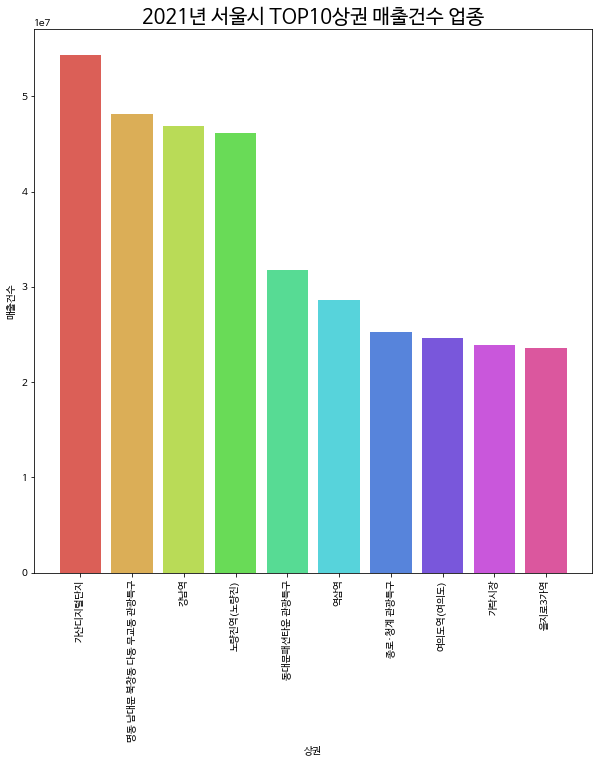

In [45]:
import seaborn as sns
colors = sns.color_palette('hls',len(data_top.index))

plt.figure(figsize=(10,10))
xtick_label_position = list(range(len(data_top.index)))
plt.xticks(xtick_label_position, data_top.index, rotation=90)

plt.bar(xtick_label_position, data_top['총 매출 건수'], color=colors) ## 바 차트 출력
 
plt.title('2021년 서울시 TOP10상권 매출건수 업종',fontsize=20) ## 타이틀 출력
plt.xlabel('상권') ## x축 라벨 출력
plt.ylabel('매출건수') ## y축 라벨 출력
plt.show()

In [46]:
data_top.index

Index(['가산디지털단지', '명동 남대문 북창동 다동 무교동 관광특구', '강남역', '노량진역(노량진)', '동대문패션타운 관광특구',
       '역삼역', '종로·청계 관광특구', '여의도역(여의도)', '가락시장', '을지로3가역'],
      dtype='object', name='상권_코드_명')